# Import modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Read data source file

In [2]:

df = pd.read_csv("./case1201.csv")
df.head(8)

,State,SAT,Takers,Income,Years,Public,Expend,Rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5
5,Montana,1033,8,263,15.91,93.7,29.48,86.4
6,Minnesota,1028,7,343,17.41,78.3,24.84,83.4
7,Utah,1022,4,333,16.57,75.2,17.42,85.9


# Check information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
State     50 non-null object
SAT       50 non-null int64
Takers    50 non-null int64
Income    50 non-null int64
Years     50 non-null float64
Public    50 non-null float64
Expend    50 non-null float64
Rank      50 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.2+ KB


In [4]:
total_records, column_len = df.shape
(column_len, total_records)

(8, 50)

In [5]:
df.describe()

,SAT,Takers,Income,Years,Public,Expend,Rank
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,947.940000,26.220000,293.980000,16.209200,81.204000,22.965600,79.988000
std,70.856397,22.022521,43.693034,0.699982,9.830917,6.144932,6.523072
min,790.000000,2.000000,208.000000,14.390000,44.800000,13.840000,69.800000
25%,889.250000,6.250000,261.500000,15.910000,76.925000,19.592500,74.025000
50%,966.000000,16.000000,295.000000,16.360000,80.800000,21.610000,80.850000
75%,998.500000,47.750000,325.000000,16.757500,88.250000,26.387500,85.825000
max,1088.000000,69.000000,401.000000,17.410000,97.000000,50.100000,90.600000


In [6]:
mode_values = [df['SAT'].mode(), df['Takers'].mode(), df['Income'].mode()]
mode_values

[0     888
 1     889
 2     896
 3     975
 4     999
 5    1045
 dtype: int64, 0    5
 dtype: int64, 0    277
 1    293
 2    295
 3    330
 4    333
 dtype: int64]

In [7]:
## null checking
df.isnull().any().any()

False

# Check tied values

In [8]:
def show_count(grouped, threshold):
    dg = grouped.size().to_frame('count')
    print(dg[dg['count'] > threshold])

In [9]:
show_count(df[['Takers']].groupby(['Takers']), 0)

        count
Takers       
2           1
3           3
4           2
5           5
6           2
7           3
8           2
9           1
10          3
11          1
14          1
16          2
18          1
19          1
31          1
32          1
36          1
39          1
40          1
42          1
46          1
47          2
48          2
50          2
51          1
52          1
54          1
56          1
59          2
64          1
65          1
69          1


In [10]:
show_count(df[['Takers']].groupby(['Takers']), 1)

        count
Takers       
3           3
4           2
5           5
6           2
7           3
8           2
10          3
16          2
47          2
48          2
50          2
59          2


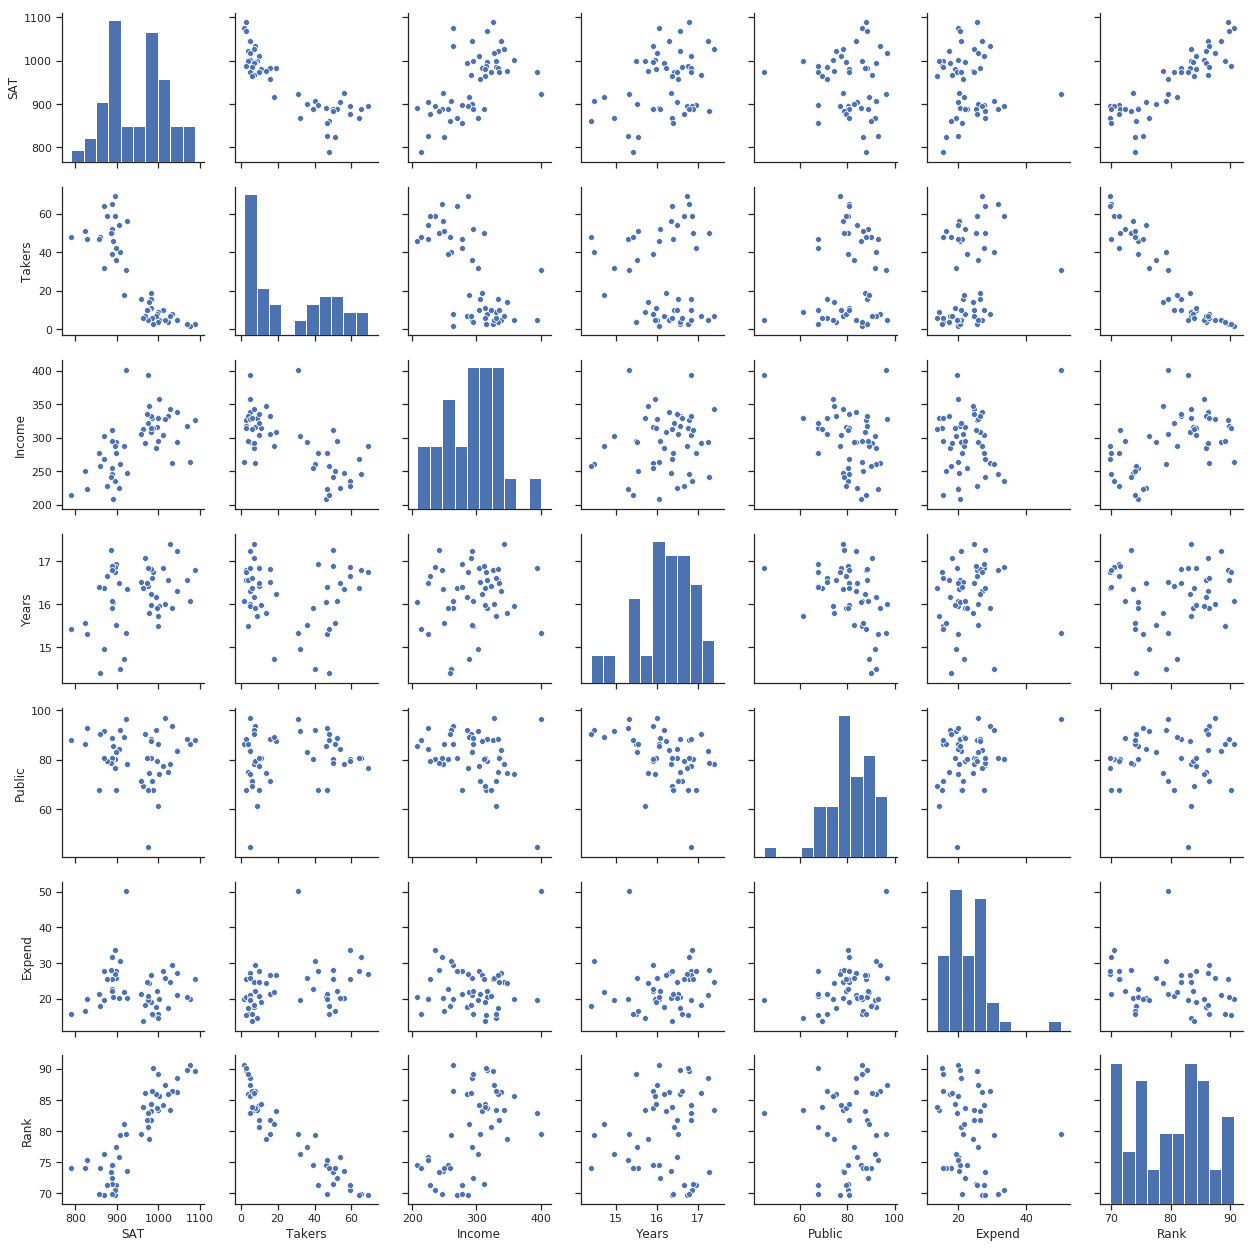

In [11]:
sns.set(style="ticks")
sns.pairplot(df)

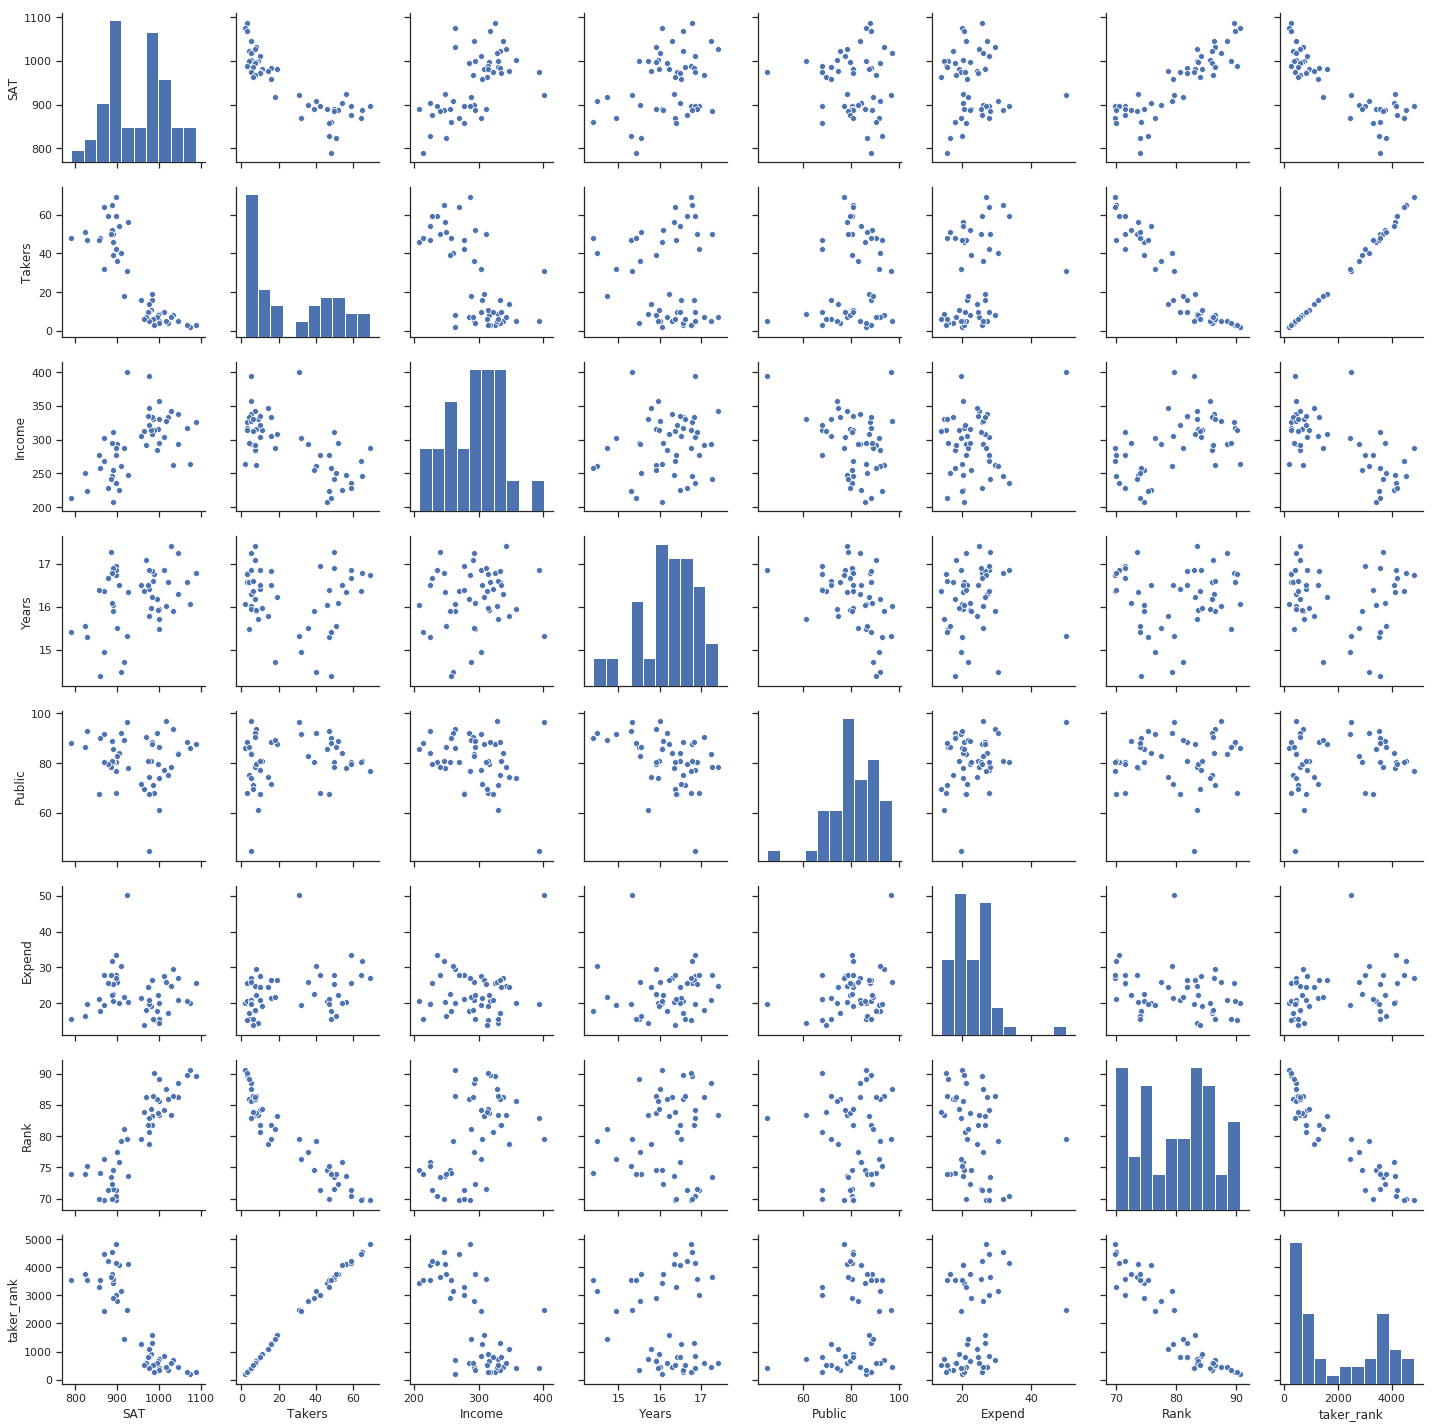

In [12]:
df['taker_rank'] = np.multiply(df.Takers, df.Rank)
sns.pairplot(df)

# Normal distribution checking

In [13]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot

SAT = df['SAT']
Takers = df['Takers']
Income = df['Income']
Years = df['Years']
Public = df['Public']
Expend = df['Expend']
Rank = df['Rank']


def interpret(sig_level, p_value):
    if p > sig_level:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')



### SAT

(array([  1.,   2.,   5.,  12.,   3.,   3.,  11.,   7.,   3.,   3.]),
 array([  790. ,   819.8,   849.6,   879.4,   909.2,   939. ,   968.8,
          998.6,  1028.4,  1058.2,  1088. ]),
 <a list of 10 Patch objects>)

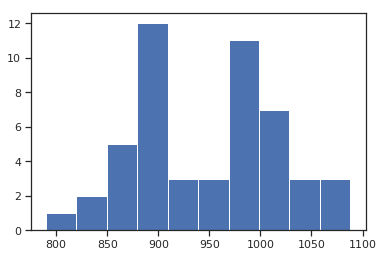

In [14]:
## histogram plot
plt.hist(SAT)

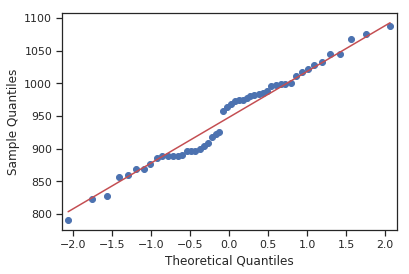

In [15]:
## Quantile-Quantile plot
qqplot(SAT, line='s')
plt.show()

In [16]:
## using Shapiro-Wilk Test
stat, p = shapiro(SAT)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.969, p=0.218


In [17]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


In [18]:
## D’Agostino’s K^2 Test
stat, p = normaltest(SAT)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2.270, p=0.321


In [19]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


# Correlation test

In [20]:
from scipy.stats import pearsonr
from scipy.stats import linregress

def correlation_interpret(sig_level, p_value):
    if p > sig_level:
        print('There is no correlation between 2 variables (fail to reject H0: p=0)')
    else:
        print('There is correlation between 2 varables at alpha=%.3f (reject H0: p=0)' %(sig_level))

### SAT - Income

In [21]:
r, p = pearsonr(Income, SAT)
print("pearson's coefficient=%.3f, p-value=%.3f" % (r, p))

correlation_interpret(0.05, p)

pearson's coefficient=0.584, p-value=0.000
There is correlation between 2 varables at alpha=0.050 (reject H0: p=0)


In [22]:
slope, intercept, r_value, p_value, std_err = linregress(Income, SAT)
print("slope=%.3f, intercept=%.3f, correlation=%.3f, p-value=%.3f, std-err=%.3f" % (slope, intercept, r_value, p_value, std_err))

slope=0.948, intercept=669.299, correlation=0.584, p-value=0.000, std-err=0.190


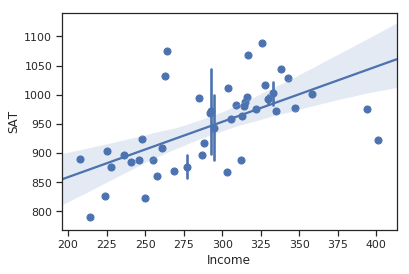

In [56]:
sns.regplot(x="Income", y="SAT", data=df, x_estimator=np.mean);

### SAT - Years

In [24]:
r, p = pearsonr(Years, SAT)
print("pearson's coefficient=%.3f, p-value=%.3f" % (r, p))

correlation_interpret(0.05, p)

pearson's coefficient=0.331, p-value=0.019
There is correlation between 2 varables at alpha=0.050 (reject H0: p=0)


In [25]:
slope, intercept, r_value, p_value, std_err = linregress(Years, SAT)
print("slope=%.3f, intercept=%.3f, correlation=%.3f, p-value=%.3f, std-err=%.3f" % (slope, intercept, r_value, p_value, std_err))

slope=33.503, intercept=404.889, correlation=0.331, p-value=0.019, std-err=13.787


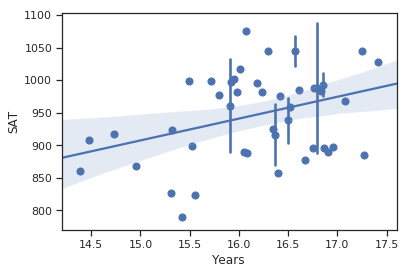

In [26]:
sns.regplot(x="Years", y="SAT", data=df, x_estimator=np.mean);

### SAT - Takers

In [27]:
from scipy.stats import kendalltau
from scipy.stats import spearmanr

def tau_interpret(sig_level, p_value):
    if p_value > sig_level:
        print('There is no correlation between 2 variables (fail to reject H0: tau=0)')
    else:
        print('There is correlation between 2 varables at alpha=%.3f (reject H0: tau=0)' %(sig_level))
        
def spearman_interpret(sig_level, p_value):
    if p_value > sig_level:
        print('There is no correlation between 2 variables (fail to reject H0: ps=0)')
    else:
        print('There is correlation between 2 varables at alpha=%.3f (reject H0: ps=0)' %(sig_level))

In [28]:
tau, p_value = kendalltau(Takers, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=-0.6612, p-value=0.0000


In [29]:
tau_interpret(0.05, p_value)

There is correlation between 2 varables at alpha=0.050 (reject H0: tau=0)


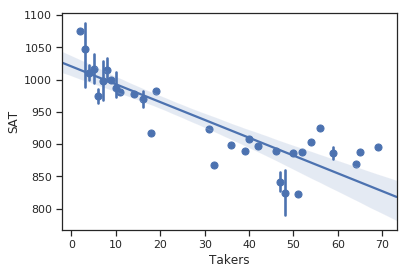

In [30]:
sns.regplot(x="Takers", y="SAT", data=df, x_estimator=np.mean);

 ### SAT - Public

In [31]:
tau, p_value = kendalltau(Public, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=-0.0312, p-value=0.7505


In [32]:
tau_interpret(0.05, p_value)

There is no correlation between 2 variables (fail to reject H0: tau=0)


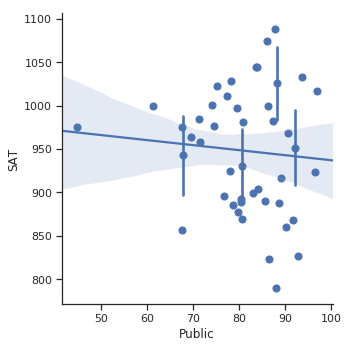

In [33]:
sns.lmplot(x="Public", y="SAT", data=df, x_estimator=np.mean);

### SAT - Expend

In [34]:
tau, p_value = spearmanr(Expend, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=-0.0493, p-value=0.7340


In [35]:
tau_interpret(0.05, p_value)

There is no correlation between 2 variables (fail to reject H0: tau=0)


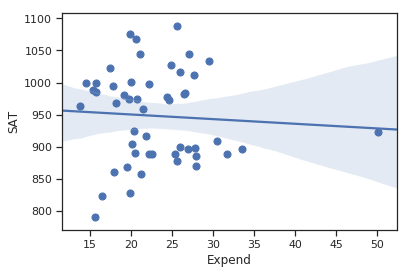

In [36]:
sns.regplot(x="Expend", y="SAT", data=df, x_estimator=np.mean);

### SAT - Rank

In [37]:
tau, p_value = kendalltau(Rank, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=0.6932, p-value=0.0000


In [38]:
tau_interpret(0.05, p_value)

There is correlation between 2 varables at alpha=0.050 (reject H0: tau=0)


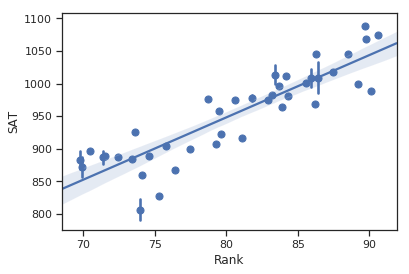

In [39]:
sns.regplot(x="Rank", y="SAT", data=df, x_estimator=np.mean);

# Linear Regression

In [40]:
from sklearn import linear_model
import statsmodels.api as sm

In [41]:
X = df[['Takers', 'Income', 'Years', 'Public', 'Expend', 'Rank']]
Y = df['SAT']

In [42]:
#sklearn utilities
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('intercept:%.3f' %(regr.intercept_))
print('Takers(x1):', regr.coef_[0])
print('Income(x2):', regr.coef_[1])
print('Years(x3):', regr.coef_[2])
print('Public(x4):', regr.coef_[3])
print('Expend(x5):', regr.coef_[4])
print('Rank(x6):', regr.coef_[5])
print('equation: %.4f + (%.4f)X1 + (%.4f)X2 + (%.4f)X3 + (%.4f)X4 + (%.4f)X5 + (%.4f)X6' 
      %(regr.intercept_, regr.coef_[0], regr.coef_[1], regr.coef_[2], regr.coef_[3],regr.coef_[4], regr.coef_[5]))

intercept:-94.659
Takers(x1): -0.48008012043
Income(x2): -0.00819501342747
Years(x3): 22.6100819085
Public(x4): -0.464152292294
Expend(x5): 2.21200485002
Rank(x6): 8.47621698476
equation: -94.6591 + (-0.4801)X1 + (-0.0082)X2 + (22.6101)X3 + (-0.4642)X4 + (2.2120)X5 + (8.4762)X6


In [67]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
print("mse:", model.mse_model ** (1/2))

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Mon, 03 Sep 2018   Prob (F-statistic):           4.16e-18
Time:                        14:16:10   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.6591    211.510     -0.448      0.6

In [66]:
X2 = df[['Years', 'Expend', 'Rank']]
Y2 = df['SAT']

X2 = sm.add_constant(X2) # adding a constant
 
model = sm.OLS(Y2, X2).fit()
predictions = model.predict(X2) 
 
print_model = model.summary()
print(print_model)
print("mse:", model.mse_model ** (1/2))

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     103.6
Date:                Mon, 03 Sep 2018   Prob (F-statistic):           1.76e-20
Time:                        14:16:03   Log-Likelihood:                -232.25
No. Observations:                  50   AIC:                             472.5
Df Residuals:                      46   BIC:                             480.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -303.7243     97.842     -3.104      0.0

In [64]:
X3 = df[['Takers', 'Years', 'Expend', 'Rank']]
Y3 = df['SAT']

X3 = sm.add_constant(X3) # adding a constant
 
model = sm.OLS(Y3, X3).fit()
predictions = model.predict(X3) 
 
print_model = model.summary()
print(print_model)
print("mse:", model.mse_model ** (1/2))

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     79.97
Date:                Mon, 03 Sep 2018   Prob (F-statistic):           7.33e-20
Time:                        14:15:42   Log-Likelihood:                -231.15
No. Observations:                  50   AIC:                             472.3
Df Residuals:                      45   BIC:                             481.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -89.6362    178.740     -0.501      0.6

In [73]:
X4 = df[['Takers', 'Years', 'Expend', 'Rank','taker_rank']]
Y4 = df['SAT']

X4 = sm.add_constant(X4) # adding a constant
 
model = sm.OLS(Y4, X4).fit()
predictions = model.predict(X4) 
 
print_model = model.summary()
print(print_model)
print("mse:", model.mse_model ** (1/2))

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     72.13
Date:                Mon, 03 Sep 2018   Prob (F-statistic):           4.51e-20
Time:                        14:19:04   Log-Likelihood:                -228.00
No. Observations:                  50   AIC:                             468.0
Df Residuals:                      44   BIC:                             479.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1825    174.821      0.070      0.9

In [47]:
def y_predict(row):
    #since const is not significant so drop it.
    return 8.1458 * row['Takers'] + 16.6565 * row['Years'] + 2.2231 * row['Expend'] + 8.0703 * row['Rank'] + (-0.1244 * row['taker_rank'])

In [48]:
# df['predict'] = df.apply (lambda row: y_predict (row),axis=1)
df['predict'] = predictions
df['residual'] = np.subtract(df['SAT'], df['predict'])

In [49]:
df.head(10)

,State,SAT,Takers,Income,Years,Public,Expend,Rank,taker_rank,predict,residual
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7,269.1,1063.620995,24.379005
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6,181.2,1049.119985,25.880015
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8,269.4,1049.655090,18.344910
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3,431.5,1027.532766,17.467234
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5,442.5,1046.203772,-1.203772
5,Montana,1033,8,263,15.91,93.7,29.48,86.4,691.2,1019.176115,13.823885
6,Minnesota,1028,7,343,17.41,78.3,24.84,83.4,583.8,1014.849747,13.150253
7,Utah,1022,4,333,16.57,75.2,17.42,85.9,343.6,1009.982239,12.017761
8,Wyoming,1017,5,328,16.01,97.0,25.96,87.5,437.5,1029.016989,-12.016989
9,Wisconsin,1011,10,304,16.85,77.3,27.69,84.2,842.0,1010.631070,0.368930


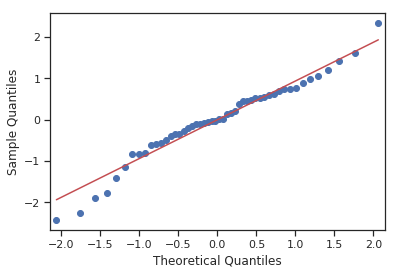

In [50]:
residual = model.resid_pearson
qqplot(residual, line='s')
plt.show()

In [51]:
## using Shapiro-Wilk Test
stat, p = shapiro(residual)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.972, p=0.277


In [52]:
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


In [53]:
df['predict'] = df.apply (lambda row: y_predict (row),axis=1)
df['residual'] = np.subtract(df['SAT'], df['predict'])

In [54]:
df

,State,SAT,Takers,Income,Years,Public,Expend,Rank,taker_rank,predict,residual
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7,269.1,1051.441265,36.558735
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6,181.2,1036.940300,38.059700
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8,269.4,1037.475507,30.524493
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3,431.5,1015.353174,29.646826
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5,442.5,1034.024430,10.975570
5,Montana,1033,8,263,15.91,93.7,29.48,86.4,691.2,1006.996943,26.003057
6,Minnesota,1028,7,343,17.41,78.3,24.84,83.4,583.8,1002.670369,25.329631
7,Utah,1022,4,333,16.57,75.2,17.42,85.9,343.6,997.802737,24.197263
8,Wyoming,1017,5,328,16.01,97.0,25.96,87.5,437.5,1016.837491,0.162509
9,Wisconsin,1011,10,304,16.85,77.3,27.69,84.2,842.0,998.452124,12.547876
